___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>


# Дополнительные материалы по Matplotlib

### Замечание: для этого блокнота нет видео-лекции, здесь мы просто рассмотрим некоторые методы для полноты картины. Если Вы сомневаетесь, какой из методов Matplotlib лучше использовать в том или ином случае, то рекомендуем Вам попробовать поискать ответ на сайте StackOverflow.

В этой лекции мы рассмотрим дополнительные темы, которые используются не так часто. Ещё больше информации Вы всегда сможете найти в документации!

#### Логарифмическая шкала

Для одной или обеих осей можно установить логарифмический масштаб шкалы. Это пример более общей системы трансформаций в Matplotlib. Масштаб каждой из осей можно указать с помощью методов `set_xscale` и `set_yscale`, которые принимают на вход один параметр, в нашем случае со значением "log":

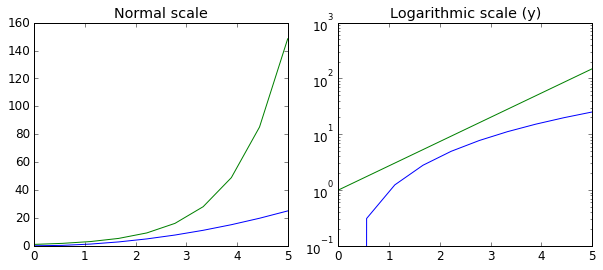

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Рисочки (ticks) и их названия

Мы можем явно указать, где именно на оси должны быть рисочки (ticks) - это делается с помощью методов `set_xticks` и `set_yticks`, на вход которым подаётся список значений, на которых должны располагаться рисочки. Также с помощью `set_xticklabels` и `set_yticklabels` можно указать соответствующие названия:

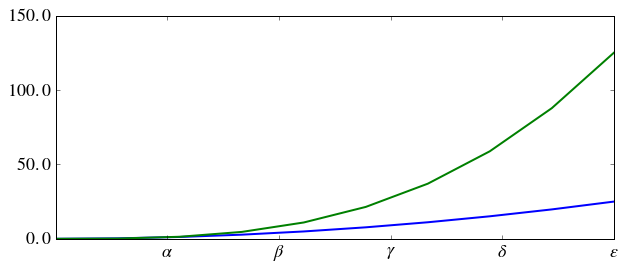

In [95]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

Также имеется целый рад дополнительных методов, с помощью которых можно поместить главные рисочки или минорные рисочки на графиках, автоматически размещая их в соответствии с некоторыми правилами. Более подробно можно почитать здесь: http://matplotlib.org/api/ticker_api.html.

#### Научная нотация - Scientific notation

Для осей с очень большими значениями можно применять научную нотацию:

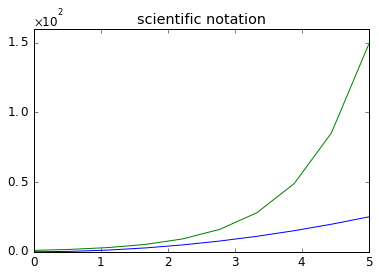

In [96]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Расстояния между осями и числами на осях

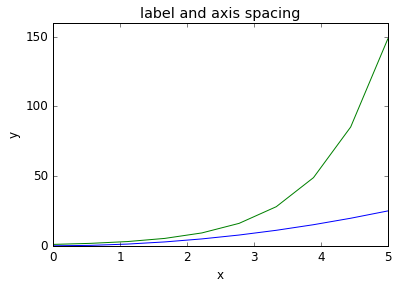

In [97]:
# Расстояния между осями x y и числами на осях
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# отступы (padding) между названиями осей и числами на осях
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [98]:
# возвращаем значения по умолчанию
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Расположение осей

К сожалению, при сохранении графиков в файлы иногда обрезаются некоторые названия. Чтобы избежать этого, требуется немного поменять местоположение осей. Это можно сделать с помощью `subplots_adjust`:

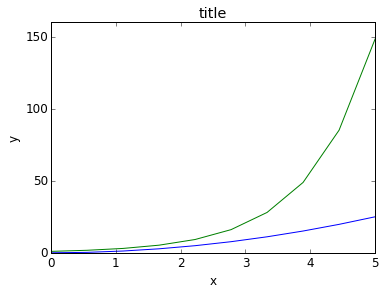

In [99]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Сетка - Axis grid

Сетку по осям можно включать и выключать с помощью метода `grid` объекта axis. В этом методе доступны те же именованные параметры, что и в методе `plot`:

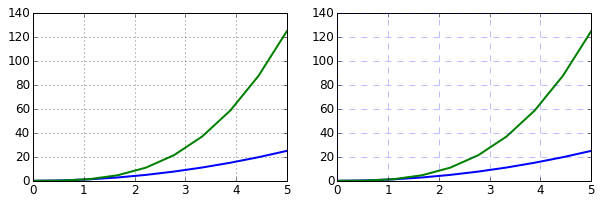

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Сплошные линии осей - Axis spines

Также можно поменять свойства сплошных линий осей - axis spines:

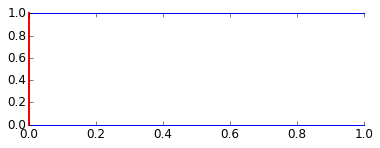

In [101]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### Двойные оси - Twin axes

Иногда бывает полезно нанести на график две разные оси - например, чтобы нарисовать две линии с разными единицами измерения. Matplotlib позволяет это сделать с помощью функций `twinx` и `twiny`:

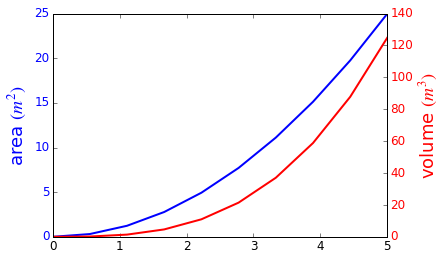

In [102]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Указываем, где на осях x и y располагается нуль

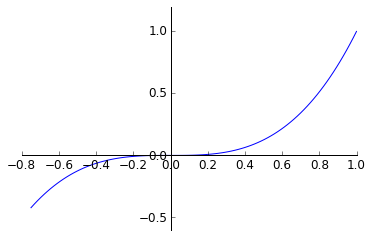

In [103]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Другие виды двумерных графиков

Кроме обычного метода `plot` существуют и другие функции, позволяющие рисовать различные виды графиков. Можете посмотреть на галерею этих графиков: http://matplotlib.org/gallery.html. Некоторые из наиболее полезных видов графиков приведены ниже:

In [104]:
n = np.array([0,1,2,3,4,5])

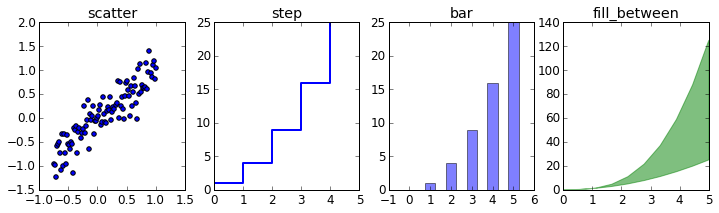

In [105]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

### Аннотация

Нанести текст на линии графиков в matplotlib можно с помощью функции `text`. Это может быть как обычный текст, так и текст в формате LaTeX (то же самое относится к названиям осей и заголовку всего графика):

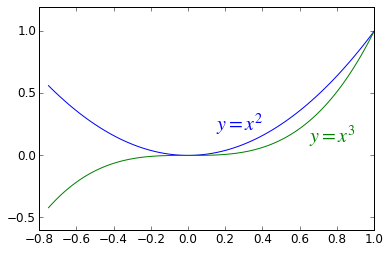

In [108]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Несколько наборов осей

На объект figure можно добавлять оси - как вручную с помощью метода `fig.add_axes`, так и с помощью различных методов по автоматизации размещения осей, таких как `subplots`, `subplot2grid` и `gridspec`:

#### subplots

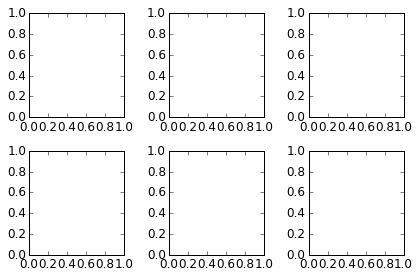

In [109]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

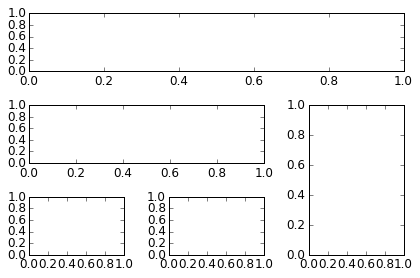

In [110]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [111]:
import matplotlib.gridspec as gridspec

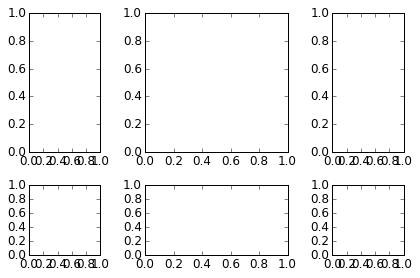

In [112]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

Добавление осей вручную с помощью `add_axes` бывает полезно, когда мы хотим поместить график внутри графика:

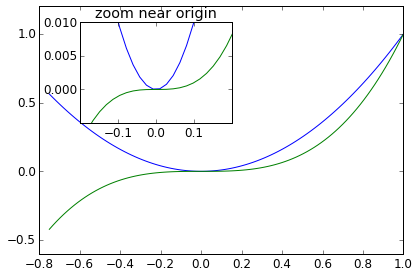

In [113]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Colormap и контурные графики

Colormaps и контурные графики полезны для рисования функций от двух переменных. В большинстве таких функций мы можем использовать карту цветов colormap, чтобы отобразить одну из переменных в виде цвета. Существуют заранее предопределённые карты цветов, но можно создавать и свои собственные. Существующие карты цветов можно посмотреть здесь: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [114]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [115]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

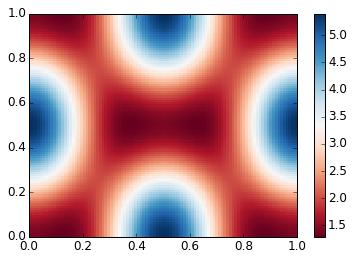

In [116]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

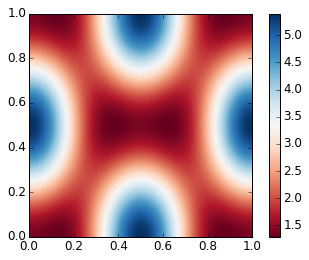

In [117]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

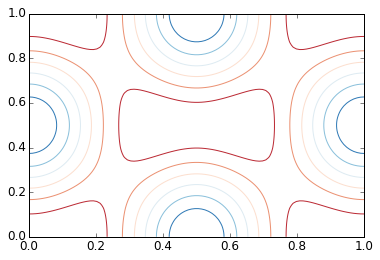

In [118]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## Трёхмерные графики

Чтобы использовать 3D-графику в matplotlib, нам нужно сначала создать экземпляр класса `Axes3D`. Трёхмерные оси можно добавлять в объект figure точно так же, как и двумерные оси. Или, что более удобно, можно передавать именованный параметр `projection='3d'` в методы `add_axes` или `add_subplot`.

In [119]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

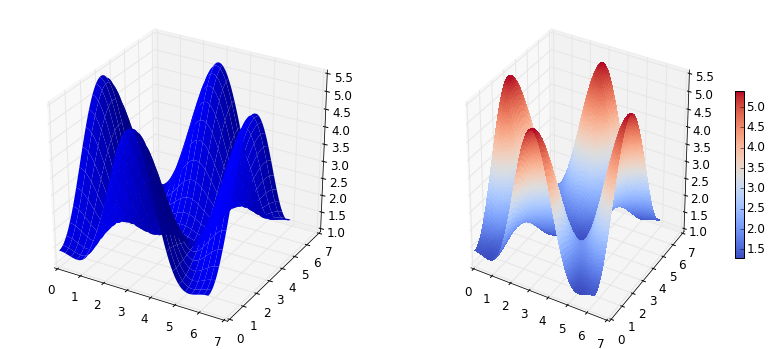

In [121]:
fig = plt.figure(figsize=(14,6))

# `ax` получается в формате 3D, потому что мы указали projection='3d' в методе add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot с градиентом цветов и шкалой цветов colorbar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Wire-frame plot

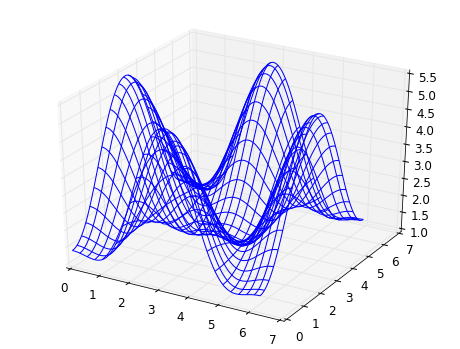

In [122]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Контурные графики с проекциями

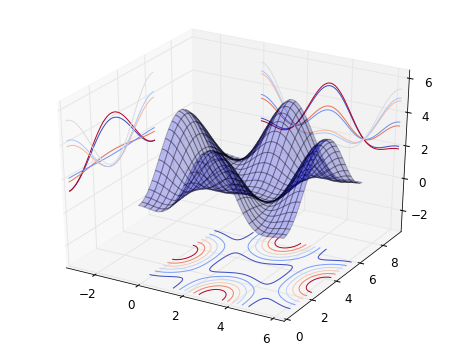

In [123]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

## Дальнейшее чтение

* http://www.matplotlib.org - Веб-страница проекта matplotlib.
* https://github.com/matplotlib/matplotlib - Исходный код matplotlib.
* http://matplotlib.org/gallery.html - Большая галерея с различными типами графиков - очень рекомендуем! 
